In [2]:
#Import the important required libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

In [5]:
#load the data set

df= pd.read_csv('D:\Projects\Machine Learning Models\datasets\diabetes.csv')

In [6]:
#Checking first records from the datasets

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#Let's check the duplicate data in data set

df.duplicated().sum()

0

In [8]:
#Data set shape

df.shape

(768, 9)

In [9]:
#Data set Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#Checking Null Values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
#we can observe that, there are lot of 0s present in the dataset. It is better to replace zeros with NaN and after that counting them would be easier and 0s need to be replaced with suitable values.

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [12]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

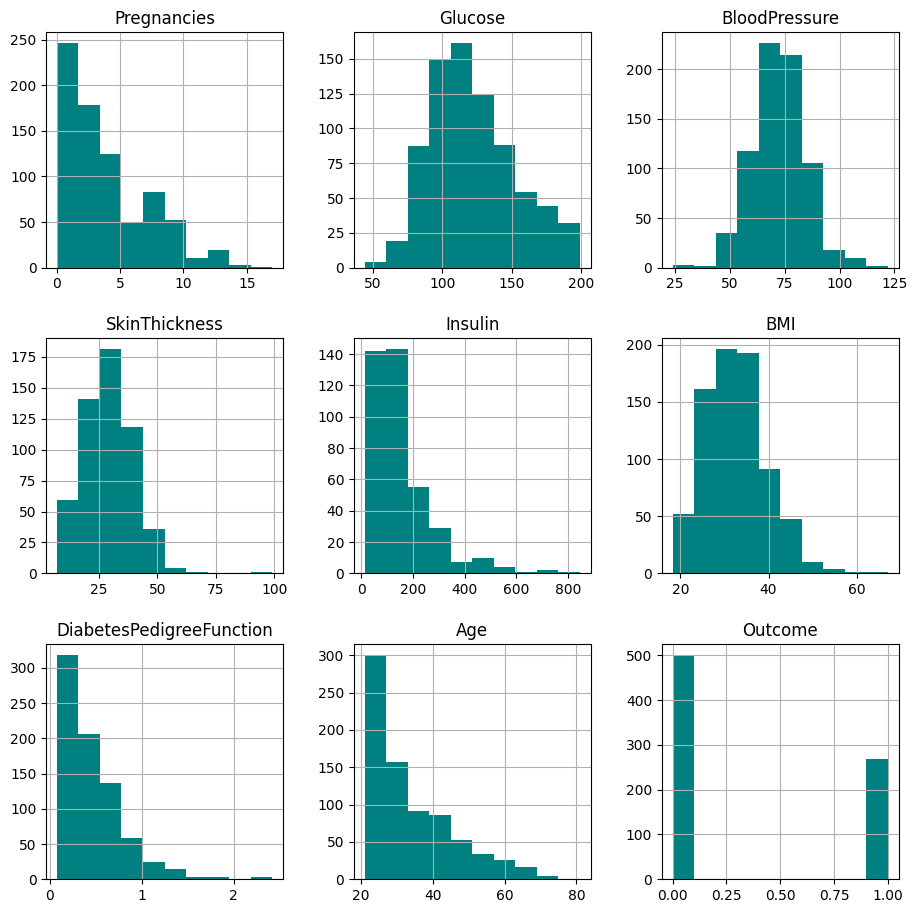

In [13]:
#We can see here that, there were lot of 0s present in the above mentioned columns.To fill these 0s with Nan values the let's see the data distribution.

df.hist(figsize = (11,11), color="#008080")

In [14]:
#Let's replace NaN values for the columns in accordance with their distribution

df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
#After replacing NaN Values, the dataset is almost clean now. We can move ahead with our EDA.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


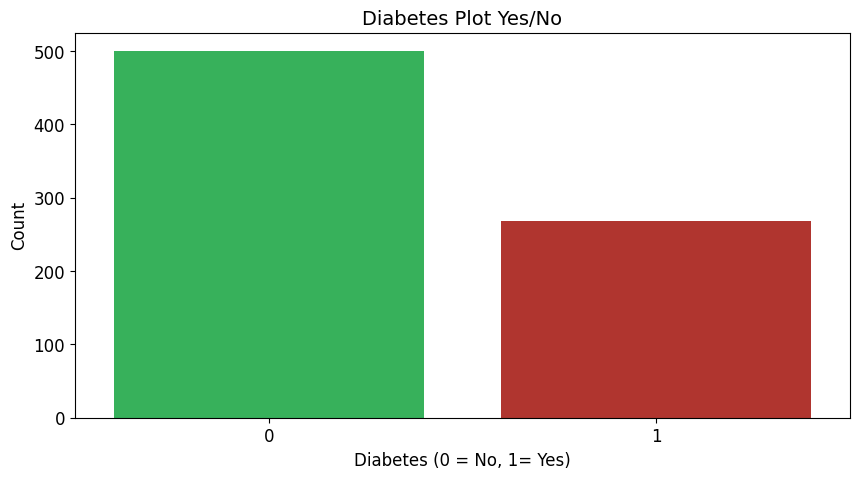

In [17]:
#Exploratory Data Analysis

plt.figure(figsize=(10,5))
plt.title('Diabetes Plot Yes/No', fontsize=14)
sns.countplot(x="Outcome", data=df, palette=('#23C552','#C52219'))
plt.xlabel("Diabetes (0 = No, 1= Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Text(0.5, 1.0, 'Diabetes Outcome vs Age')

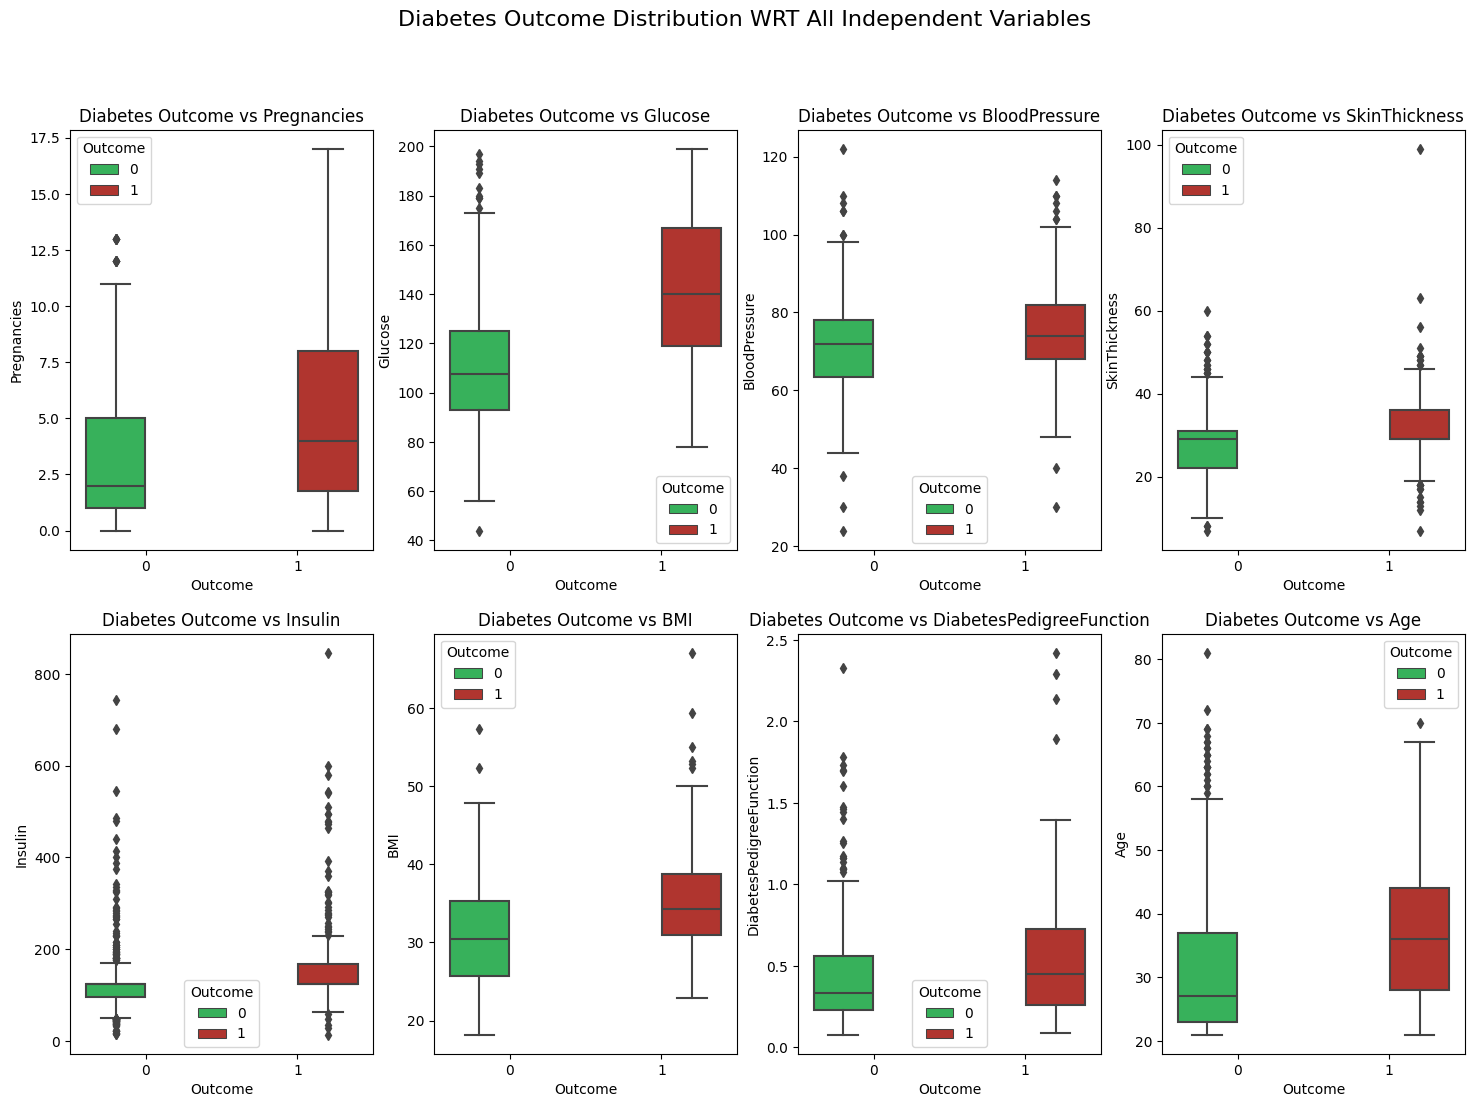

In [18]:
#From above plot, we can say that there are less number of diabetic patients in the data set.

fig, axes = plt.subplots(2, 4, figsize=(18, 12))
fig.suptitle('Diabetes Outcome Distribution WRT All Independent Variables', fontsize=16)

sns.boxplot(ax=axes[0, 0], x=df['Outcome'], y=df['Pregnancies'], hue=df['Outcome'], palette=('#23C552','#C52219'))
axes[0, 0].set_title("Diabetes Outcome vs Pregnancies", fontsize=12)

sns.boxplot(ax=axes[0, 1], x=df['Outcome'], y=df['Glucose'], hue=df['Outcome'], palette=('#23C552','#C52219'))
axes[0, 1].set_title("Diabetes Outcome vs Glucose", fontsize=12)

sns.boxplot(ax=axes[0, 2], x=df['Outcome'], y=df['BloodPressure'], hue=df['Outcome'], palette=('#23C552','#C52219'))
axes[0, 2].set_title("Diabetes Outcome vs BloodPressure", fontsize=12)

sns.boxplot(ax=axes[0, 3], x=df['Outcome'], y=df['SkinThickness'], hue=df['Outcome'], palette=('#23C552','#C52219'))
axes[0, 3].set_title("Diabetes Outcome vs SkinThickness", fontsize=12)

sns.boxplot(ax=axes[1, 0], x=df['Outcome'], y=df['Insulin'], hue=df['Outcome'], palette=('#23C552','#C52219'))
axes[1, 0].set_title("Diabetes Outcome vs Insulin", fontsize=12)

sns.boxplot(ax=axes[1, 1], x=df['Outcome'], y=df['BMI'], hue=df['Outcome'], palette=('#23C552','#C52219'))
axes[1, 1].set_title("Diabetes Outcome vs BMI", fontsize=12)

sns.boxplot(ax=axes[1, 2], x=df['Outcome'], y=df['DiabetesPedigreeFunction'], hue=df['Outcome'], palette=('#23C552','#C52219'))
axes[1, 2].set_title("Diabetes Outcome vs DiabetesPedigreeFunction", fontsize=12)

sns.boxplot(ax=axes[1, 3], x=df['Outcome'], y=df['Age'], hue=df['Outcome'], palette=('#23C552','#C52219'))
axes[1, 3].set_title("Diabetes Outcome vs Age", fontsize=12)

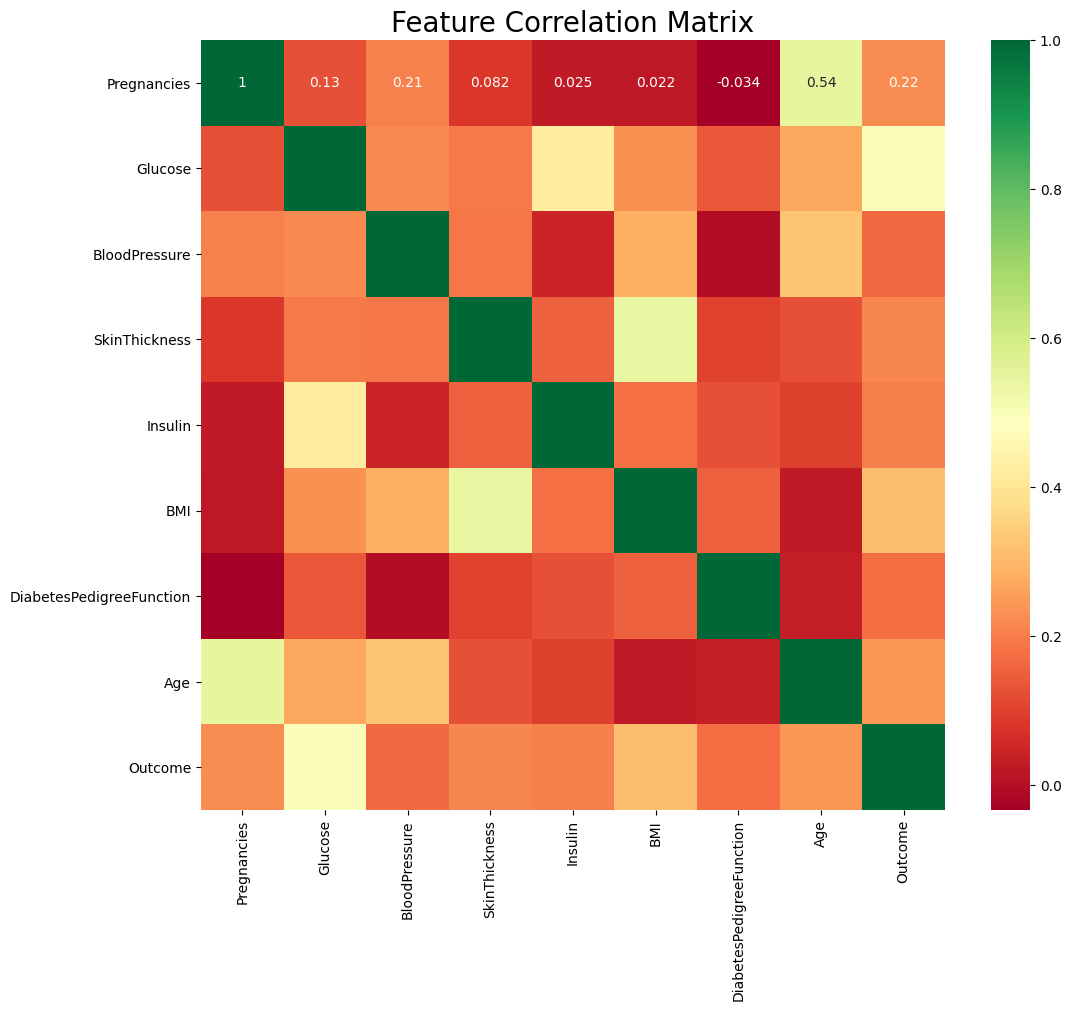

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.title("Feature Correlation Matrix",fontsize=20)
plt.show()

In [20]:
#Modelling

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [22]:
#First Let's split the data in to x and y.

from sklearn.model_selection import train_test_split

x = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [34]:
#Then we use the standard scaler to scale the data.

from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_scaled= sc.fit_transform(x)

C:\Users\Shinoa Chan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Shinoa Chan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Shinoa Chan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

In [24]:
#First Let's split the data into train and test.

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=0)

In [25]:
x_train.shape, y_train.shape

((537, 8), (537,))

In [26]:
x_test.shape, y_test.shape

((231, 8), (231,))

In [27]:
#Applying Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

C:\Users\Shinoa Chan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Shinoa Chan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [28]:
#Computing confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score

confmat = confusion_matrix(y_pred, y_test)
confmat

C:\Users\Shinoa Chan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Shinoa Chan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Shinoa Chan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

array([[140,  38],
       [ 17,  36]], dtype=int64)

C:\Users\Shinoa Chan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Shinoa Chan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Shinoa Chan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

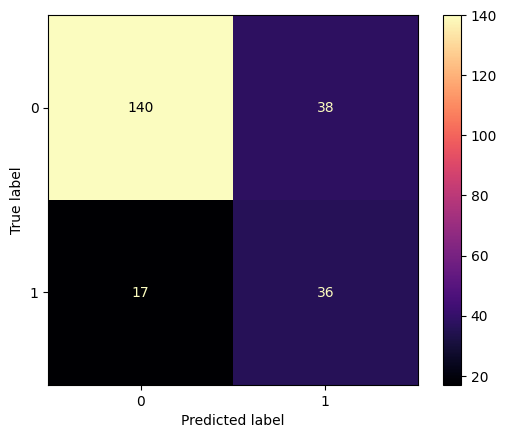

In [29]:
from sklearn import metrics

cm=metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred,y_test,labels=logreg.classes_),
                              display_labels=logreg.classes_)
cm.plot(cmap="magma")

In [31]:
print("Accuracy = ",accuracy_score(y_pred, y_test))

Accuracy =  0.7619047619047619


C:\Users\Shinoa Chan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Shinoa Chan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Shinoa Chan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp